# Figure 3b: Co 0-->1-->0 Timepoint Graph
Also, Co 1-->0 in S10b
## Import Modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

from turtles.turtles_utils import *

## Set Filepaths

In [3]:
#: Overall directory for TdT project data and analysis
tdt_dir = '/mnt/c/Users/jonst/Box Sync/All_dNTP_data/'

#: Subdirectory for NGS run
data_dir = tdt_dir + 'Data_and_Results/All_Data_Filtered_Trimmed/Co_010_2_full/'

#: Filename prefixes for 0 control conditions
zero_control_conds = ['Mg_1_FLD0313-250126970',
                      'Mg_2_FLD0314-250134935',
                      'Mg_3_FLD0315-250124990']

#: Filename prefixes for 1 control conditions
one_control_conds = ['Co_1_FLD0316-250137920',
                     'Co_2_FLD0317-250127955',
                     'Co_3_FLD0318-250125993']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + 'turtles/figures/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

## Load Sequences

In [4]:
seqs_dict = read_seqs(data_dir, filename_end=filename_end, cutoff=5.8)

Loading 010_1_FLD0321-250134934
Read 357058 sequences...

Loading 010_2_FLD0322-250141898
Read 421736 sequences...

Loading 010_3_FLD0323-250127951
Read 364749 sequences...

Loading 010_4_FLD0329-250129958
Read 387757 sequences...

Loading 010_5_FLD0330-250129959
Read 394940 sequences...

Loading 010_6_FLD0331-250138918
Read 461729 sequences...

Loading 10_1_FLD0324-250132935
Read 365783 sequences...

Loading 10_2_FLD0325-250132937
Read 364481 sequences...

Loading 10_3_FLD0326-250131949
Read 461218 sequences...

Loading 10_4_FLD0332-250124988
Read 350123 sequences...

Loading 10_5_FLD0333-250126968
Read 422405 sequences...

Loading 10_6_FLD0334-250137919
Read 388863 sequences...

Loading Co_1_FLD0316-250137920
Read 360681 sequences...

Loading Co_2_FLD0317-250127955
Read 339347 sequences...

Loading Co_3_FLD0318-250125993
Read 375438 sequences...

Loading Mg_1_FLD0313-250126970
Read 367678 sequences...

Loading Mg_2_FLD0314-250134935
Read 403585 sequences...

Loading Mg_3_FLD0315-2501

## Choose Legend Labels for Plotting
### Condition Labels

In [5]:
condition_dict = {}
conditions = seqs_dict.keys()
for condition in conditions:
    if '010' in condition:
        condition_dict[condition] = '010 (20,40 min)'
    elif '10' in condition:
        condition_dict[condition] = '10 (40 min)'
    elif 'Co' in condition:
        condition_dict[condition] = '1 Control'
    elif 'Mg' in condition:
        condition_dict[condition] = '0 Control'
    elif 'NoTdT' in condition:
        condition_dict[condition] = 'No TdT Control'
    else:
        print('Error: {} not recognized.'.format(condition))

### Replicate Labels

In [6]:
import re
rep_dict = {}
for condition in conditions:
    rep_dict[condition] = condition[3:][re.search("[0-9]+", condition[3:]).start()]

## Bin Sequences, Calculate dNTP Frequency, and Transform into Aitchison Space
Note: Binning can take a while.

In [8]:
counts_dict = get_norm_len_base_counts(seqs_dict, num_bins=1000)

010_1_FLD0321-250134934 processed

010_2_FLD0322-250141898 processed

010_3_FLD0323-250127951 processed

010_4_FLD0329-250129958 processed

010_5_FLD0330-250129959 processed

010_6_FLD0331-250138918 processed

10_1_FLD0324-250132935 processed

10_2_FLD0325-250132937 processed

10_3_FLD0326-250131949 processed

10_4_FLD0332-250124988 processed

10_5_FLD0333-250126968 processed

10_6_FLD0334-250137919 processed

Co_1_FLD0316-250137920 processed

Co_2_FLD0317-250127955 processed

Co_3_FLD0318-250125993 processed

Mg_1_FLD0313-250126970 processed

Mg_2_FLD0314-250134935 processed

Mg_3_FLD0315-250124990 processed

NoTdT_FLD0327-250138921 processed



In [9]:
pcts_dict = calc_norm_len_base_pcts(counts_dict)

In [10]:
clr_data = calc_aitchison_distance(pcts_dict)

## Calculate and Plot Timepoint Results

### Convert Data into Long-Form pandas DataFrame

In [11]:
data = generate_aitch_df(pcts_dict, clr_data, condition_dict, rep_dict,
                         zero_control_conds, one_control_conds)
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,G % Aitch Diff from 0,T % Aitch Diff from 0,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %
0,010_1_FLD0321-250134934,"010 (20,40 min)",1,1,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.003565,0.011176,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921
1,010_1_FLD0321-250134934,"010 (20,40 min)",1,2,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.003565,0.011176,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921
2,010_1_FLD0321-250134934,"010 (20,40 min)",1,3,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.003565,0.011176,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921
3,010_1_FLD0321-250134934,"010 (20,40 min)",1,4,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.003565,0.011176,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921
4,010_1_FLD0321-250134934,"010 (20,40 min)",1,5,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.003565,0.011176,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921


In [12]:
data = calc_signal(data, zero_control_conds, one_control_conds)
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal
0,010_1_FLD0321-250134934,"010 (20,40 min)",1,1,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544
1,010_1_FLD0321-250134934,"010 (20,40 min)",1,2,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544
2,010_1_FLD0321-250134934,"010 (20,40 min)",1,3,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544
3,010_1_FLD0321-250134934,"010 (20,40 min)",1,4,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544
4,010_1_FLD0321-250134934,"010 (20,40 min)",1,5,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544


### Calculate Switch Times (for 1-->0 condition)
A more sophisticated algorithm (Glaser et al.) is used for 0-->1-->0 as described in the paper.

In [13]:
len_dists = get_length_dists(seqs_dict)
averages = parse_fastq_lengths(len_dists, expt_time=60)
averages

,Directory,Mean,Std Devs,Rate (nt/min)
0,010_1_FLD0321-250134934,31.237442,17.170479,0.520624
1,010_2_FLD0322-250141898,36.371704,15.691767,0.606195
2,010_3_FLD0323-250127951,35.706686,15.427200,0.595111
3,010_4_FLD0329-250129958,30.750171,15.032680,0.512503
4,010_5_FLD0330-250129959,36.914198,17.877903,0.615237
5,010_6_FLD0331-250138918,35.297012,16.733763,0.588284
6,10_1_FLD0324-250132935,38.033386,16.570294,0.633890
7,10_2_FLD0325-250132937,33.848907,15.883147,0.564148
8,10_3_FLD0326-250131949,35.818511,16.028922,0.596975
9,10_4_FLD0332-250124988,45.930944,20.154379,0.765516


In [14]:
averages = calc_switch_bins(averages, data, mode='10')
averages

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin
0,010_1_FLD0321-250134934,31.237442,17.170479,0.520624,NaN
1,010_2_FLD0322-250141898,36.371704,15.691767,0.606195,135.020005
2,010_3_FLD0323-250127951,35.706686,15.427200,0.595111,147.998636
3,010_4_FLD0329-250129958,30.750171,15.032680,0.512503,NaN
4,010_5_FLD0330-250129959,36.914198,17.877903,0.615237,3.368348
5,010_6_FLD0331-250138918,35.297012,16.733763,0.588284,5.477017
6,10_1_FLD0324-250132935,38.033386,16.570294,0.633890,513.916417
7,10_2_FLD0325-250132937,33.848907,15.883147,0.564148,697.776743
8,10_3_FLD0326-250131949,35.818511,16.028922,0.596975,572.689040
9,10_4_FLD0332-250124988,45.930944,20.154379,0.765516,297.661425


In [15]:
averages = calc_switch_times(averages, num_bins=1000, start_control_conds=zero_control_conds,
                             end_control_conds=one_control_conds, t_expt=60)
averages

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin,Switch Time
0,010_1_FLD0321-250134934,31.237442,17.170479,0.520624,NaN,NaN
1,010_2_FLD0322-250141898,36.371704,15.691767,0.606195,135.020005,8.981847
2,010_3_FLD0323-250127951,35.706686,15.427200,0.595111,147.998636,9.829184
3,010_4_FLD0329-250129958,30.750171,15.032680,0.512503,NaN,NaN
4,010_5_FLD0330-250129959,36.914198,17.877903,0.615237,3.368348,0.227840
5,010_6_FLD0331-250138918,35.297012,16.733763,0.588284,5.477017,0.370374
6,10_1_FLD0324-250132935,38.033386,16.570294,0.633890,513.916417,32.633021
7,10_2_FLD0325-250132937,33.848907,15.883147,0.564148,697.776743,43.351735
8,10_3_FLD0326-250131949,35.818511,16.028922,0.596975,572.689040,36.110410
9,10_4_FLD0332-250124988,45.930944,20.154379,0.765516,297.661425,19.404511


In [16]:
# Make sure there aren't switch times for controls or things will look weird when we convert bin to time
averages.loc[averages.Directory == 'Mg_2_FLD0314-250134935', 'Switch Time'] = None
averages.loc[averages.Directory == 'Mg_3_FLD0315-250124990', 'Switch Time'] = None
averages.loc[averages.Directory == 'NoTdT_FLD0327-250138921', 'Switch Time'] = None
averages

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin,Switch Time
0,010_1_FLD0321-250134934,31.237442,17.170479,0.520624,NaN,NaN
1,010_2_FLD0322-250141898,36.371704,15.691767,0.606195,135.020005,8.981847
2,010_3_FLD0323-250127951,35.706686,15.427200,0.595111,147.998636,9.829184
3,010_4_FLD0329-250129958,30.750171,15.032680,0.512503,NaN,NaN
4,010_5_FLD0330-250129959,36.914198,17.877903,0.615237,3.368348,0.227840
5,010_6_FLD0331-250138918,35.297012,16.733763,0.588284,5.477017,0.370374
6,10_1_FLD0324-250132935,38.033386,16.570294,0.633890,513.916417,32.633021
7,10_2_FLD0325-250132937,33.848907,15.883147,0.564148,697.776743,43.351735
8,10_3_FLD0326-250131949,35.818511,16.028922,0.596975,572.689040,36.110410
9,10_4_FLD0332-250124988,45.930944,20.154379,0.765516,297.661425,19.404511


In [29]:
print('Switch Time Average for 1-->0 (Figure S10b)')
avgs = [averages.iloc[6:12,5].mean()]
avgs

Switch Time Average for 1-->0 (Figure S10b)


[36.74276405380463]

In [30]:
print('Switch Time Standard Deviation for 1-->0 (Figure S10b)')
stds = [averages.iloc[6:12,5].std()]
stds

Switch Time Standard Deviation for 1-->0 (Figure S10b)


[9.951187467365518]

In [31]:
switch_times = pd.DataFrame()
switch_times['Time'] = [40]
switch_times['Predicted Time Average'] = avgs
switch_times['Predicted Time Std Dev'] = stds
switch_times

,Time,Predicted Time Average,Predicted Time Std Dev
0,40,36.742764,9.951187


In [32]:
switch_times.to_csv(figure_dir + '/Co_10_Predictions.csv', index=False)

# Convert bin number to time

In [19]:
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal
0,010_1_FLD0321-250134934,"010 (20,40 min)",1,1,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544
1,010_1_FLD0321-250134934,"010 (20,40 min)",1,2,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544
2,010_1_FLD0321-250134934,"010 (20,40 min)",1,3,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544
3,010_1_FLD0321-250134934,"010 (20,40 min)",1,4,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544
4,010_1_FLD0321-250134934,"010 (20,40 min)",1,5,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.493067,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544


In [20]:
def convert_bins_to_times(switch_bin, n_bins, switch_time, t_expt):
    times = []
    for bin_i in range(n_bins):
        if not np.isnan(switch_time):
            if bin_i < switch_bin:
                time_i = ((bin_i) / (switch_bin)) * (switch_time)
            else:
                time_i = ((bin_i - switch_bin) / (n_bins - switch_bin)) * (t_expt - switch_time) + switch_time
        else:
            time_i = (bin_i / n_bins) * t_expt
        times.append(time_i)
    return times

In [21]:
data['Time'] = None
texpt = 60

switch_bins = [averages['Switch Bin'][0:6].mean()] * 6 \
              + [averages['Switch Bin'][6:12].mean()] * 6 \
              + [np.nan] * 7
switch_times = [averages['Switch Time'][0:6].mean()] * 6 \
               + [averages['Switch Time'][6:12].mean()] * 6 \
               + [np.nan] * 7

for directory, switch_bin, switch_time in zip(averages['Directory'],
                                              switch_bins,
                                              switch_times):
    data.loc[data.Directory == directory, 'Time'] = convert_bins_to_times(switch_bin, 1000, switch_time, texpt)

In [22]:
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal,Time
0,010_1_FLD0321-250134934,"010 (20,40 min)",1,1,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544,0.0
1,010_1_FLD0321-250134934,"010 (20,40 min)",1,2,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544,0.066501
2,010_1_FLD0321-250134934,"010 (20,40 min)",1,3,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544,0.133002
3,010_1_FLD0321-250134934,"010 (20,40 min)",1,4,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544,0.199503
4,010_1_FLD0321-250134934,"010 (20,40 min)",1,5,0.030641,0.577072,0.463078,-0.419478,0.637827,-0.681427,...,0.181967,0.220333,0.090767,0.342108,0.141538,0.407433,0.108921,0.050421,0.020544,0.266004


### Plot Timepoint Results
Note: plotting can take a while if a lot of bins are used.

In [23]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
mpl.rc('font',family='Times New Roman')

In [24]:
colors = [(41/255, 171/255, 226/255),   # 20 min
          (241/255, 90/255, 36/255),    # 1 control
          (119/255, 178/255, 150/255)]  # 0 control
sns.set_palette(sns.color_palette(colors))

<ipython-input-25-9274bb50c2ea>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[data.Condition != '010 (20,40 min)'][data.Condition != 'No TdT Control'],
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


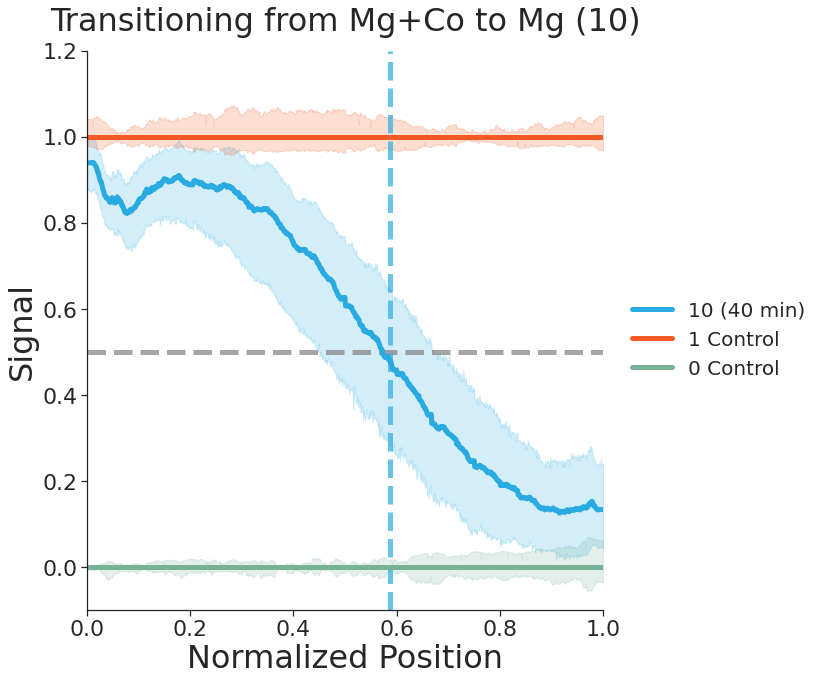

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

num_bins = 1000

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

# Add switch bins
ax.axvline(averages.iloc[6:12, 4].mean(), color=sns.color_palette()[0], alpha=.7, ls='--')

sns.lineplot(x='Bin Number', y='Signal', hue='Condition',
             data=data[data.Condition != '010 (20,40 min)'][data.Condition != 'No TdT Control'],
             ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, num_bins)
ax.set_xticks(range(0, num_bins + 1, int(num_bins / 5)))
ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32))
ax.set_xlabel('Normalized Position', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.2)
ax.set_title('Transitioning from Mg+Co to Mg (10)', fontsize=32, pad=20)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_10_Timepoint_Norm')
fig.savefig(figure_dir + 'Co_10_Timepoint_Norm.svg')
plt.show()

<ipython-input-26-402f06301e9e>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[data.Condition != '010 (20,40 min)'][data.Condition != 'No TdT Control'],


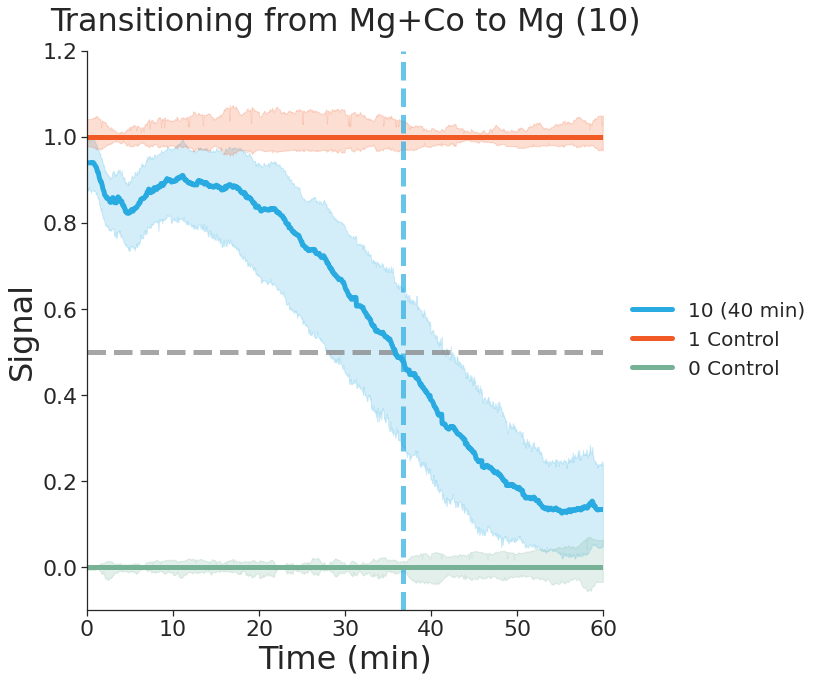

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

texpt = 60

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

# Add switch bins
ax.axvline(averages.iloc[6:12, 5].mean(), color=sns.color_palette()[0], alpha=.7, ls='--')

sns.lineplot(x='Time', y='Signal', hue='Condition',
             data=data[data.Condition != '010 (20,40 min)'][data.Condition != 'No TdT Control'],
             ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, texpt)
ax.set_xticks(range(0, texpt + 1, int(texpt / 6)))
ax.set_xticklabels(np.arange(0, texpt + 1, 10, dtype=int))
ax.set_xlabel('Time (min)', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.2)
ax.set_title('Transitioning from Mg+Co to Mg (10)', fontsize=32, pad=20)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_10_Timepoint_Time')
fig.savefig(figure_dir + 'Co_10_Timepoint_Time.svg')
plt.show()

<ipython-input-27-13cdf48fb6f1>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[data.Condition != '10 (40 min)'][data.Condition != 'No TdT Control'],


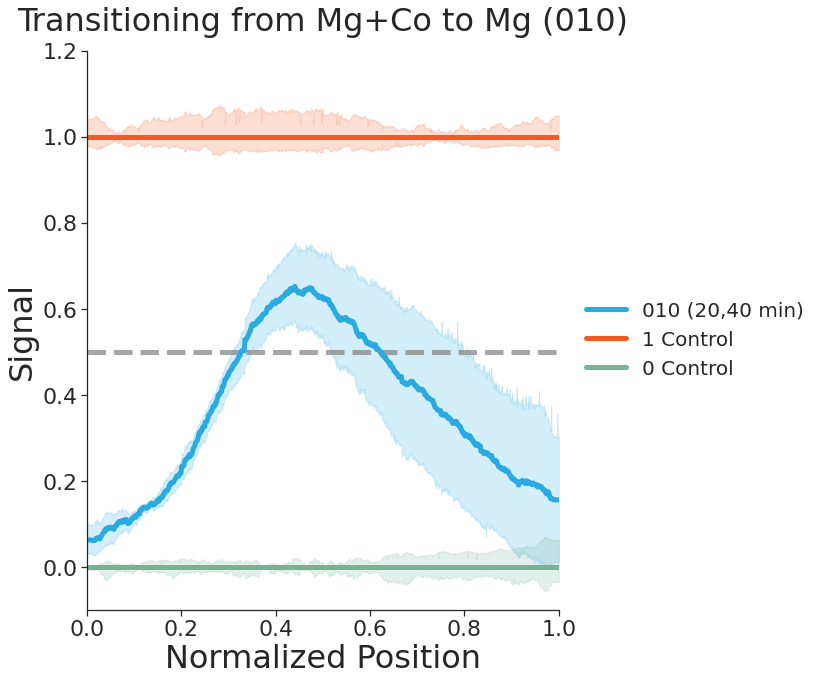

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

num_bins = 1000

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

sns.lineplot(x='Bin Number', y='Signal', hue='Condition',
             data=data[data.Condition != '10 (40 min)'][data.Condition != 'No TdT Control'],
             ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, num_bins)
ax.set_xticks(range(0, num_bins + 1, int(num_bins / 5)))
ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32))
ax.set_xlabel('Normalized Position', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.2)
ax.set_title('Transitioning from Mg+Co to Mg (010)', fontsize=32, pad=20)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_010_Timepoint_Norm')
fig.savefig(figure_dir + 'Co_010_Timepoint_Norm.svg')
plt.show()

<ipython-input-28-8720ca3bc867>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[data.Condition != '10 (40 min)'][data.Condition != 'No TdT Control'],


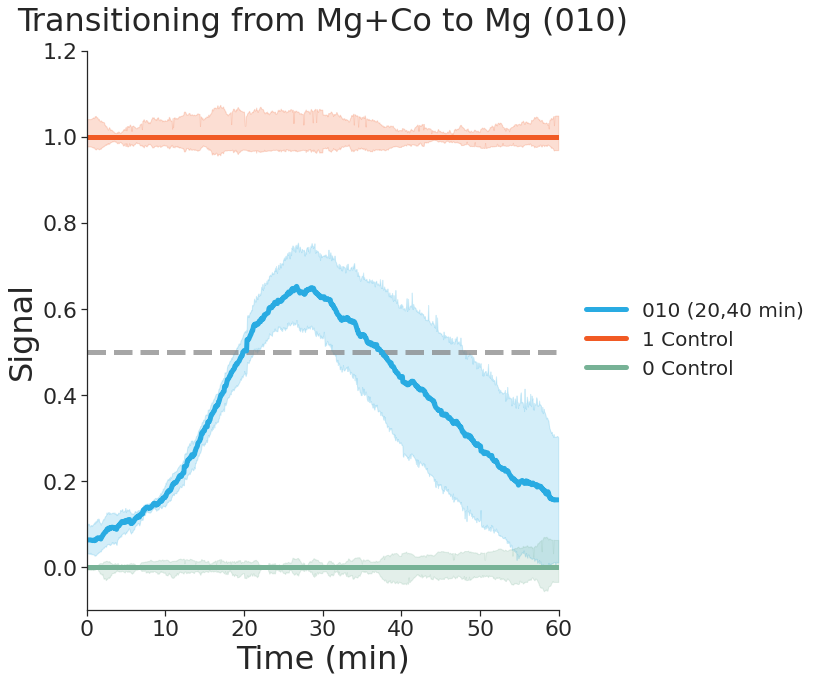

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

texpt = 60

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

sns.lineplot(x='Time', y='Signal', hue='Condition',
             data=data[data.Condition != '10 (40 min)'][data.Condition != 'No TdT Control'],
             ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, texpt)
ax.set_xticks(range(0, texpt + 1, int(texpt / 6)))
ax.set_xticklabels(np.arange(0, texpt + 1, 10, dtype=int))
ax.set_xlabel('Time (min)', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.2)
ax.set_title('Transitioning from Mg+Co to Mg (010)', fontsize=32, pad=20)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_010_Timepoint_Time')
fig.savefig(figure_dir + 'Co_010_Timepoint_Time.svg')
plt.show()

# Step Plots

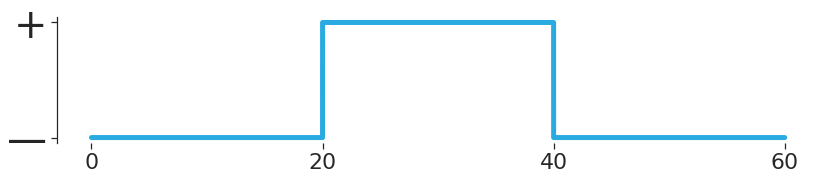

In [40]:
# 010 actual
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

step_plot_x = [0, 19.999, 20.001, 39.999, 40.001, 60]
step_plot_y = [0, 0, 1, 1, 0, 0]
    
sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_010_StepPlot_Actual')
fig.savefig(figure_dir + 'Co_010_StepPlot_Actual.svg')
plt.show()

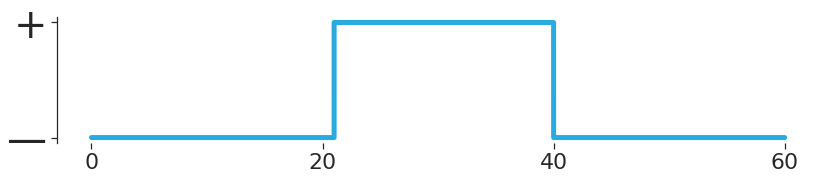

In [43]:
# 010 actual (Josh predicted 21, 40 min)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

step_plot_x = [0, 20.999, 21.001, 39.999, 40.001, 60]
step_plot_y = [0, 0, 1, 1, 0, 0]
    
sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_010_StepPlot_Predicted_Josh')
fig.savefig(figure_dir + 'Co_010_StepPlot_Predicted_Josh.svg')
plt.show()